In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

df.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
# Preprocessing
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

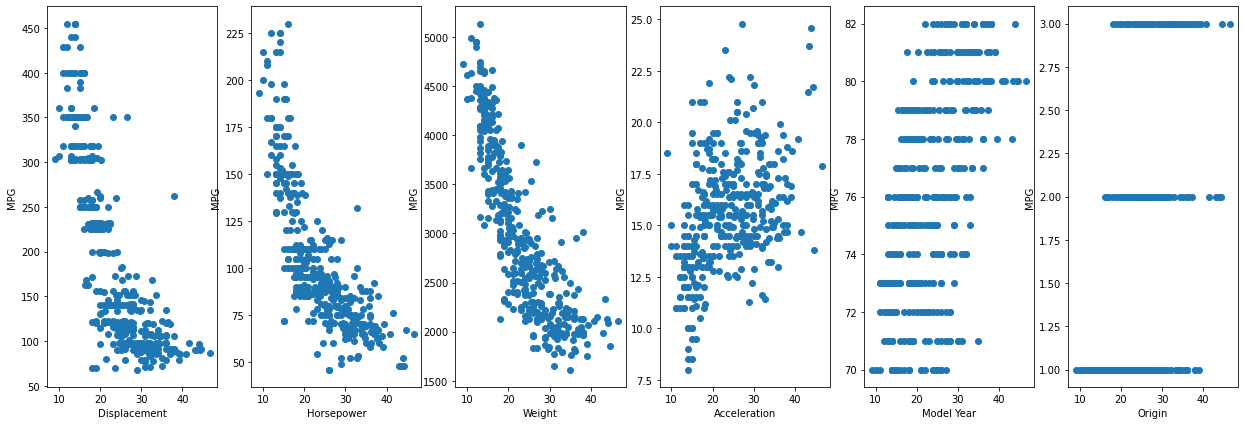

In [5]:
# Drop all the NAN 
df = df.dropna()

# Seprate labels from the data
y = np.array(df.MPG.values)
x = df.drop(['MPG'], axis =1, inplace = True)

plt.figure(figsize=(25,7))

for i in range(1,7):
    plt.subplot(1, 7, i+1)
    plt.scatter(y, df.iloc[:,i])
    plt.xlabel(df.columns[i])
    plt.ylabel('MPG')

In [6]:
x  = df.drop(['Cylinders','Acceleration','Model Year','Origin'], axis =1)
x


,Displacement,Horsepower,Weight
0,307.0,130.0,3504.0
1,350.0,165.0,3693.0
2,318.0,150.0,3436.0
3,304.0,150.0,3433.0
4,302.0,140.0,3449.0
...,...,...,...
393,140.0,86.0,2790.0
394,97.0,52.0,2130.0
395,135.0,84.0,2295.0
396,120.0,79.0,2625.0


In [7]:
# Apply scaling to the inputs data
normalizer = tf.keras.layers.Normalization(axis=-1)
horsepower = np.array(x.Horsepower)
horsepower_normalized = tf.keras.layers.Normalization(input_shape = [1], axis=None)
horsepower_normalized.adapt(horsepower)


In [9]:
model = tf.keras.Sequential([
                                horsepower_normalized,
                                tf.keras.layers.Dense(units = 1)
                            
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [10]:
model.compile(
              loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1))


history = model.fit(x.Horsepower,y,epochs=100,verbose=2,validation_split=0.2)

Epoch 1/100
10/10 - 0s - loss: 20.8832 - val_loss: 31.0316 - 358ms/epoch - 36ms/step
Epoch 2/100
10/10 - 0s - loss: 19.7990 - val_loss: 30.4709 - 25ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 18.6989 - val_loss: 29.9116 - 28ms/epoch - 3ms/step
Epoch 4/100
10/10 - 0s - loss: 17.5707 - val_loss: 29.2339 - 26ms/epoch - 3ms/step
Epoch 5/100
10/10 - 0s - loss: 16.5330 - val_loss: 28.5466 - 29ms/epoch - 3ms/step
Epoch 6/100
10/10 - 0s - loss: 15.5691 - val_loss: 27.6991 - 30ms/epoch - 3ms/step
Epoch 7/100
10/10 - 0s - loss: 14.7049 - val_loss: 26.6762 - 25ms/epoch - 2ms/step
Epoch 8/100
10/10 - 0s - loss: 13.8186 - val_loss: 25.4764 - 31ms/epoch - 3ms/step
Epoch 9/100
10/10 - 0s - loss: 12.9382 - val_loss: 24.2212 - 27ms/epoch - 3ms/step
Epoch 10/100
10/10 - 0s - loss: 12.0325 - val_loss: 23.0087 - 29ms/epoch - 3ms/step
Epoch 11/100
10/10 - 0s - loss: 11.1520 - val_loss: 21.7663 - 31ms/epoch - 3ms/step
Epoch 12/100
10/10 - 0s - loss: 10.2603 - val_loss: 20.6694 - 25ms/epoch - 3ms/step

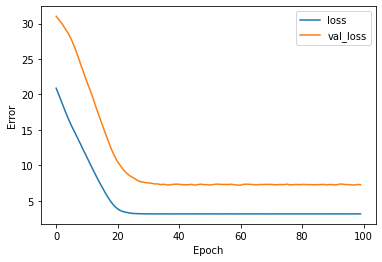

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()


In [12]:
x1 = tf.linspace(0.0, 250, 251)
y1 = model.predict(x1)


8/8 [==============================] - 0s 977us/step


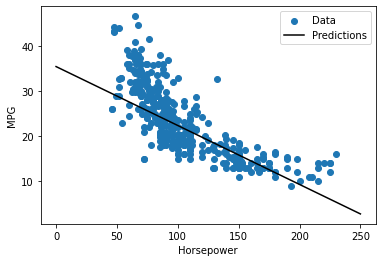

In [13]:
plt.scatter(x.Horsepower, y, label='Data')
plt.plot(x1,y1, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


In [14]:
# Dense layer

model1 = tf.keras.Sequential([
                                horsepower_normalized,
                                tf.keras.layers.Dense(32, activation = 'relu'),
                                tf.keras.layers.Dense(16, activation = 'relu'),
                                tf.keras.layers.Dense(8,  activation = 'relu'),
                                tf.keras.layers.Dense(1),

])

model1.compile( loss = tf.keras.losses.MAE, 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

In [15]:
history1 = model1.fit(x.Horsepower,y, validation_split=0.2, epochs =100, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 21.5023 - val_loss: 31.8280
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 21.3244 - val_loss: 31.7306
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 21.1639 - val_loss: 31.6414
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 20.9841 - val_loss: 31.5411
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 20.7532 - val_loss: 31.3969
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 20.4261 - val_loss: 31.1306
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 19.9562 - val_loss: 30.7315
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 19.2961 - val_loss: 30.1998
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 18.4336 - val_loss: 29.4966
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 17.3447 - val_lo

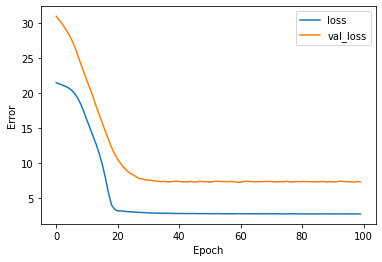

In [16]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

In [17]:
x2 = tf.linspace(0.0, 250, 251)
y2 = model.predict(x2)

8/8 [==============================] - 0s 610us/step


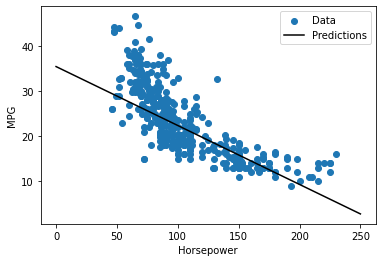

In [18]:
plt.scatter(x.Horsepower, y, label='Data')
plt.plot(x2,y2, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()